## Web Scrapping

## binance

## Create financial chart

## Code

In [ ]:
import requests
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

market = 'BTCUSDT'
tick_interval = '1h'
candle_limit = 500

url = 'https://api.binance.com/api/v1/klines?symbol='+market+'&interval='+tick_interval+'&limit='+str(candle_limit)
data = requests.get(url).json()



## Code Breakdown

In [ ]:
# Import Library

import requests
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
# Get data

market = 'BTCUSDT'
tick_interval = '1h'
candle_limit = 500

url = 'https://api.binance.com/api/v1/klines?symbol='+market+'&interval='+tick_interval+'&limit='+str(candle_limit)
data = requests.get(url).json()

dt_date = []
dt_candle = []

for dt in data:
  dt_date.append(datetime.fromtimestamp(dt[0]/1000).strftime('%Y-%m-%d %H:%M:%S'))
  dt_candle.append(dt[1:6])

df = pd.DataFrame(dt_candle, index=pd.DatetimeIndex(dt_date), 
                  columns=['Open', 'High', 'Low', 'Close', 'Volume'], dtype='float64')
df['VWAP'] = ((df['Volume'] * ((df['High'] + df['Low'] + df['Low'] + df['Close'])/3)).cumsum())/df['Volume'].cumsum()


In [ ]:
data[0]

[1597568400000,
 '11843.74000000',
 '11884.72000000',
 '11811.88000000',
 '11875.41000000',
 '1517.80974000',
 1597571999999,
 '18002975.30894405',
 24945,
 '703.80894500',
 '8348103.32645153',
 '0']

In [ ]:
# crate data and price

dt_date = []
dt_candle = []

for dt in data:
  dt_date.append(datetime.fromtimestamp(dt[0]/1000).strftime('%Y-%m-%d %H:%M:%S'))
  dt_candle.append(dt[1:6])

In [ ]:
print(dt_date[0])

2020-08-16 09:00:00


In [ ]:
dt_candle[0]

['11843.74000000',
 '11884.72000000',
 '11811.88000000',
 '11875.41000000',
 '1517.80974000']

In [ ]:
# Add label

df = pd.DataFrame(dt_candle, index=pd.DatetimeIndex(dt_date), 
                  columns=['Open', 'High', 'Low', 'Close', 'Volume'], dtype='float64')

In [ ]:
df.head(1)

,Open,High,Low,Close,Volume
2020-08-16 09:00:00,11843.74,11884.72,11811.88,11875.41,1517.80974


In [ ]:
df['VWAP'] = ((df['Volume'] * ((df['High'] + df['Low'] + df['Close'])/3)).cumsum())/df['Volume'].cumsum()

In [ ]:
df.head(1)

,Open,High,Low,Close,Volume,VWAP
2020-08-16 09:00:00,11843.74,11884.72,11811.88,11875.41,1517.80974,11857.336667


In [ ]:
# Create chart from plotly

fig = go.Figure( go.Scatter(x=df.index, y=df['Close']) )
fig.show()

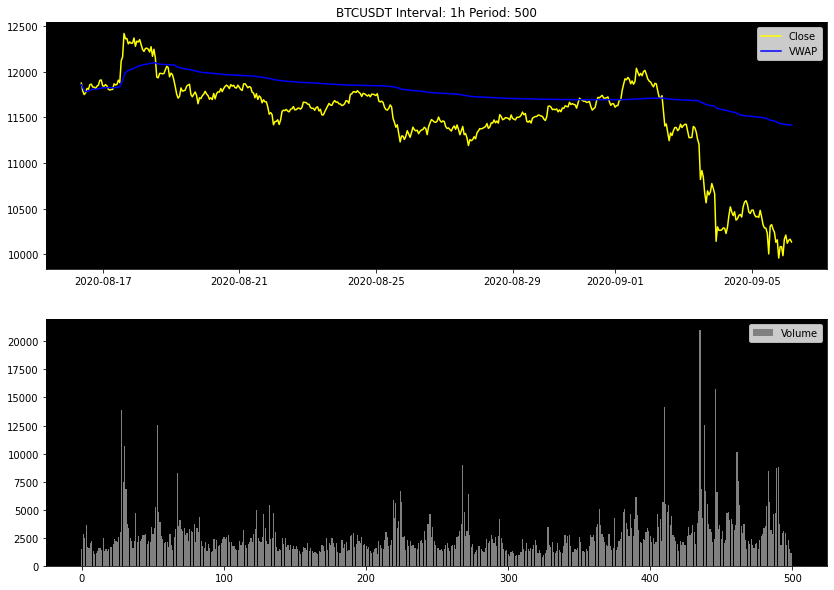

In [ ]:
# Create chart from matplotlib

rcParams['figure.figsize'] = 14,10
rcParams['axes.facecolor'] = 'black'
rcParams['legend.facecolor'] = 'white'

x_index = range(len(df))
chart_title = market + ' Interval: ' + tick_interval  + ' Period: '  + str(candle_limit)

plt.subplot(2, 1, 1)
plt.title(chart_title)
plt.plot(df.index, df['Close'], label = 'Close', color = 'yellow')
plt.plot(df.index, df['VWAP'], label='VWAP', color='blue')
plt.legend()
plt.subplot(2, 1, 2)
plt.bar(x_index, df['Volume'], label = 'Volume', color = 'gray')
plt.legend()
plt.show()